In [3]:
import torch
import matplotlib.pyplot as plt
from models import Generator
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [11]:
def latent_space_interpolation(generator, latent_steps=10, latent_size=100):
    if not os.path.exists("final_images"):
        os.makedirs("final_images")

    generator.eval()

    # Generate random latent vectors
    latent_start = torch.randn(1, latent_size).to(device)
    latent_end = torch.randn(1, latent_size).to(device)

    # Interpolate linearly between the two latent vectors
    interpolated_latents = torch.linspace(0, 1, latent_steps).view(-1, 1).to(device) * latent_end + (1 - torch.linspace(0, 1, latent_steps)).view(-1, 1).to(device) * latent_start

    # Generate images from interpolated latent vectors
    generated_images = []
    for latent_vector in interpolated_latents:
        # Generate image from interpolated latent vector
        with torch.no_grad():
            latent_vector = latent_vector.view(1, -1)
            fake_images = generator(latent_vector)
            fake_images = fake_images / 2 + .5
        generated_images.append(fake_images)

    # Visualize the generated images
    if latent_steps > 7:
        num_rows = 2
        num_cols = latent_steps // 2
    else:
        num_rows = 1
        num_cols = latent_steps

    # Visualize the generated images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, image in enumerate(generated_images):
        row_idx = i // num_cols
        col_idx = i % num_cols
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        ax.imshow(image.squeeze().permute(1, 2, 0).cpu().detach().numpy())
        ax.axis('off')
    plt.tight_layout()
    plt.savefig("final_images/ls_interpolation.png")
    plt.show()


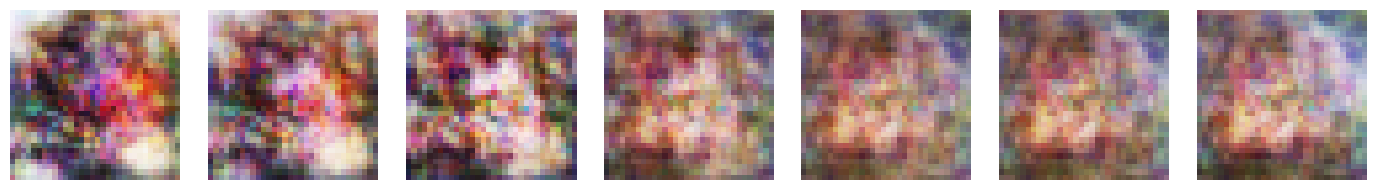

In [16]:
generator = Generator(latent_size=100).to(device)
generator.load_state_dict(torch.load("final_models/final_generator.pth"))

latent_space_interpolation(generator, latent_steps=7)